## IRIS DATA ANALYSIS AND CLASSIFICATION

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report, accuracy_score

In [4]:
#Load the dataset
iris = pd.read_csv("Iris-Data.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check dataset dimensions and missing values
print(f"Rows: {iris.shape[0]}, Columns: {iris.shape[1]}")
print("Missing values:\n",iris.isnull().sum())
print("Unique values per column:\n",iris.nunique())

Rows: 150, Columns: 5
Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Unique values per column:
 sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Separate features and labels
x = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x)

## Exploratory Data Analysis

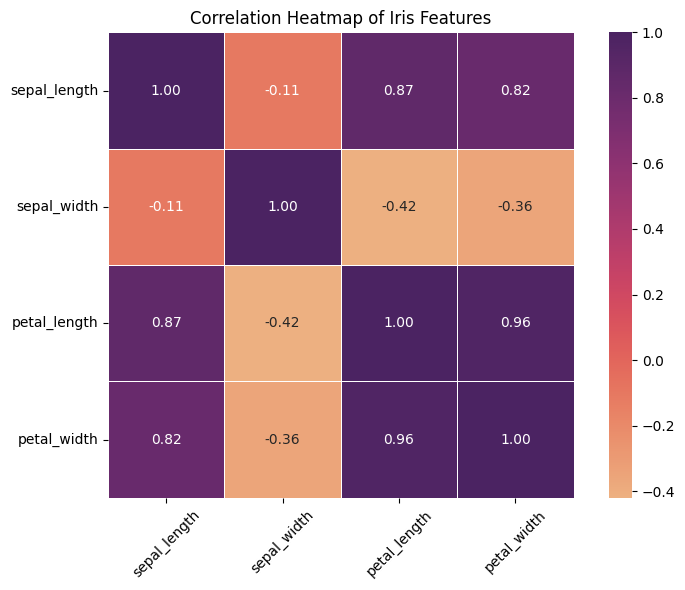

In [10]:
# Compute the correlation matrix
correlation_matrix = iris.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,           # Display correlation coefficients
    cmap='flare',         # Use magma color palette
    fmt=".2f",            # Format numbers to 2 decimal places
    linewidths=0.5,       # Add space between cells
    square=True           # Make cells square
)

plt.title("Correlation Heatmap of Iris Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-3898884023.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


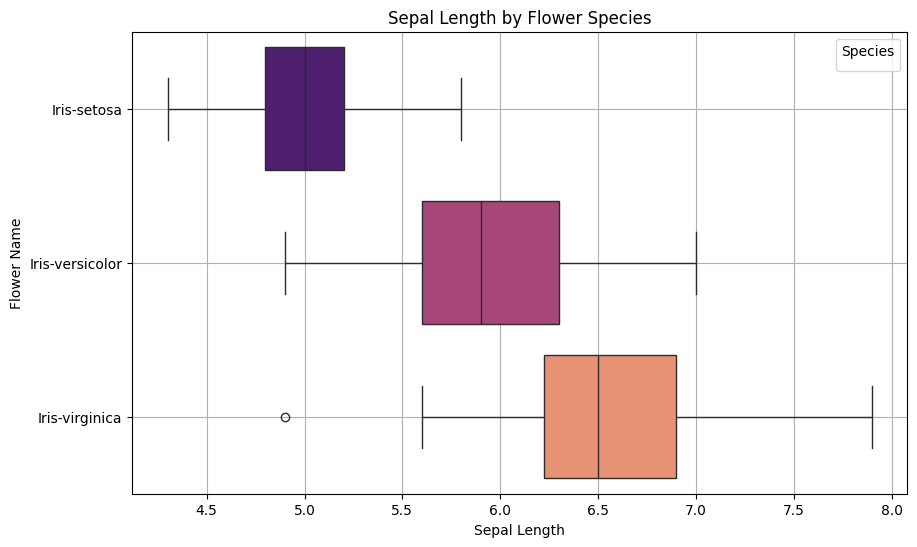

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=iris,
    x='sepal_length',
    y='species',
    hue='species',
    palette='magma',  # You can change this to 'pastel', 'deep', 'Set1', etc.
)

plt.title("Sepal Length by Flower Species")
plt.xlabel("Sepal Length")
plt.ylabel("Flower Name")
plt.legend(title="Species")
plt.grid(True)
plt.show()

/tmp/ipython-input-12-2992553122.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


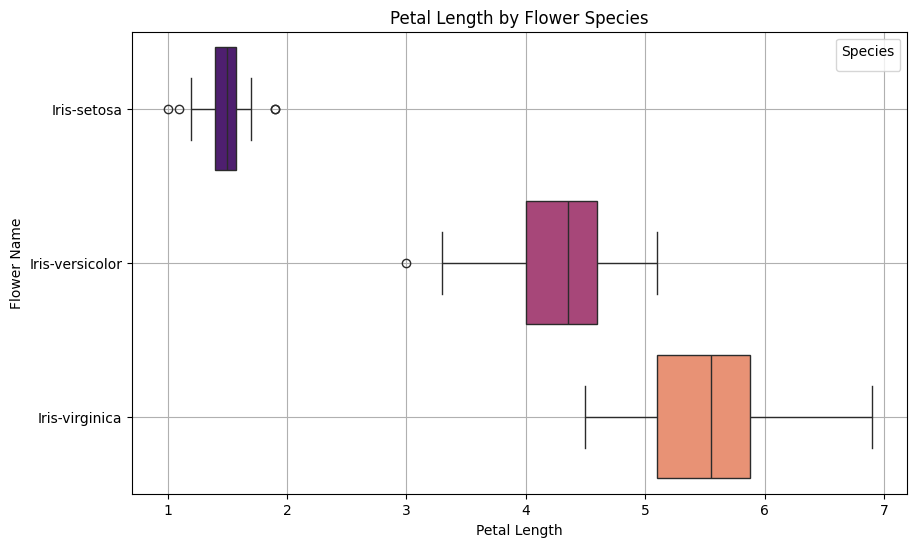

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=iris,
    x='petal_length',
    y='species',
    hue='species',
    palette='magma',
)

plt.title("Petal Length by Flower Species")
plt.xlabel("Petal Length")
plt.ylabel("Flower Name")
plt.legend(title="Species")
plt.grid(True)
plt.show()

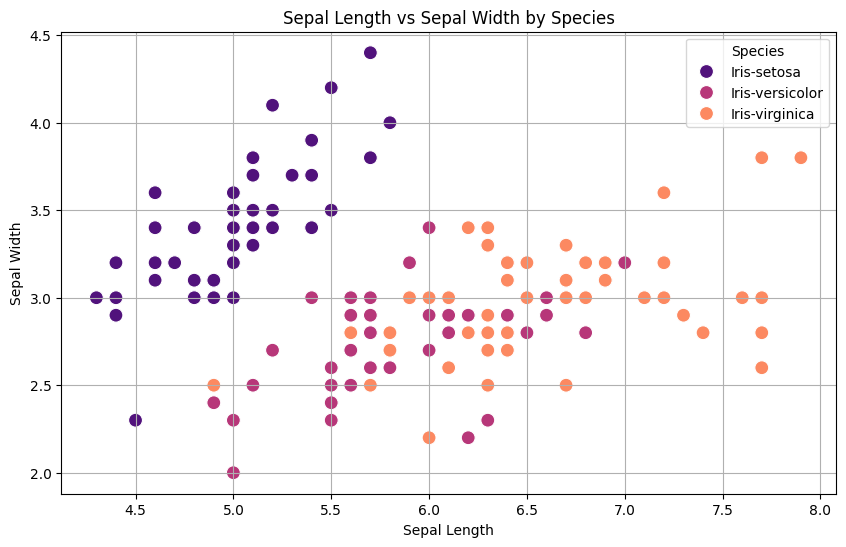

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='sepal_width',
    hue='species',
    palette='magma',
    s=100
)

plt.title("Sepal Length vs Sepal Width by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title="Species")
plt.grid(True)
plt.show()

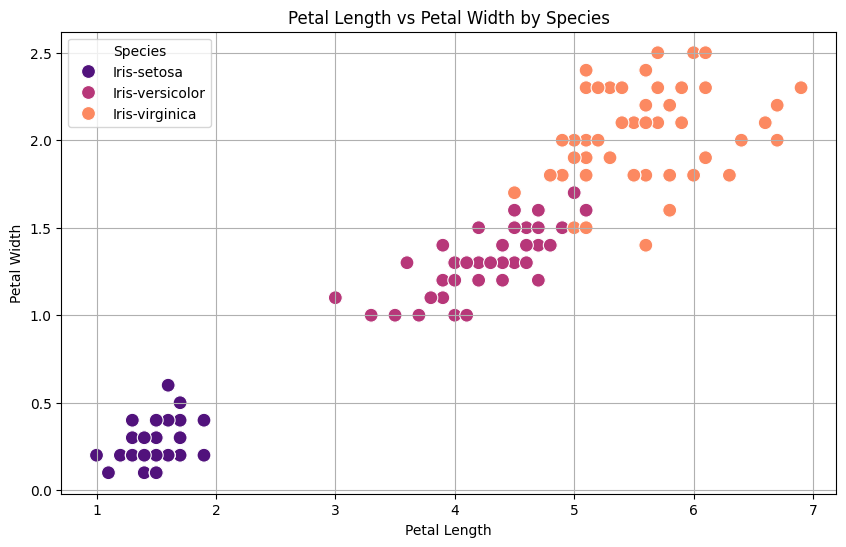

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris,
    x='petal_length',
    y='petal_width',
    hue='species',
    palette='magma',
    s=100
)

plt.title("Petal Length vs Petal Width by Species")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(title="Species")
plt.grid(True)
plt.show()

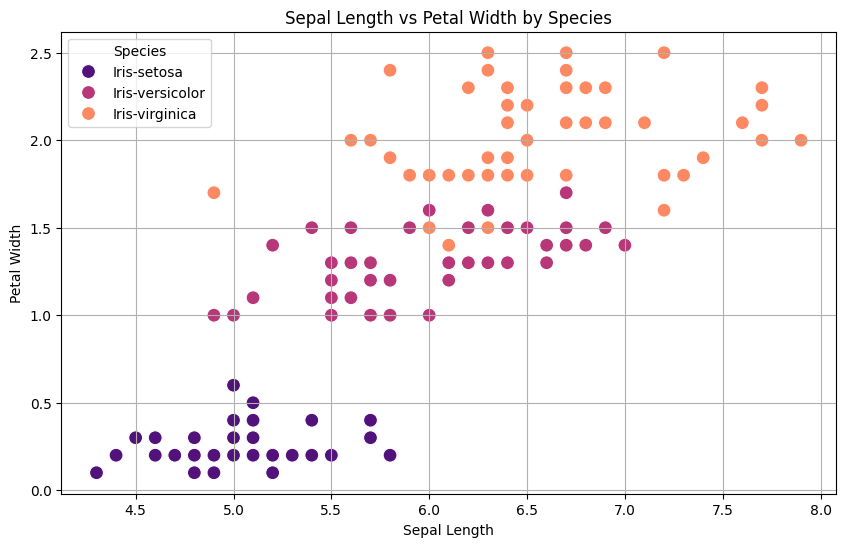

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris,
    x='sepal_length',
    y='petal_width',
    hue='species',
    palette='magma',
    s=100
)

plt.title("Sepal Length vs Petal Width by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend(title="Species")
plt.grid(True)
plt.show()

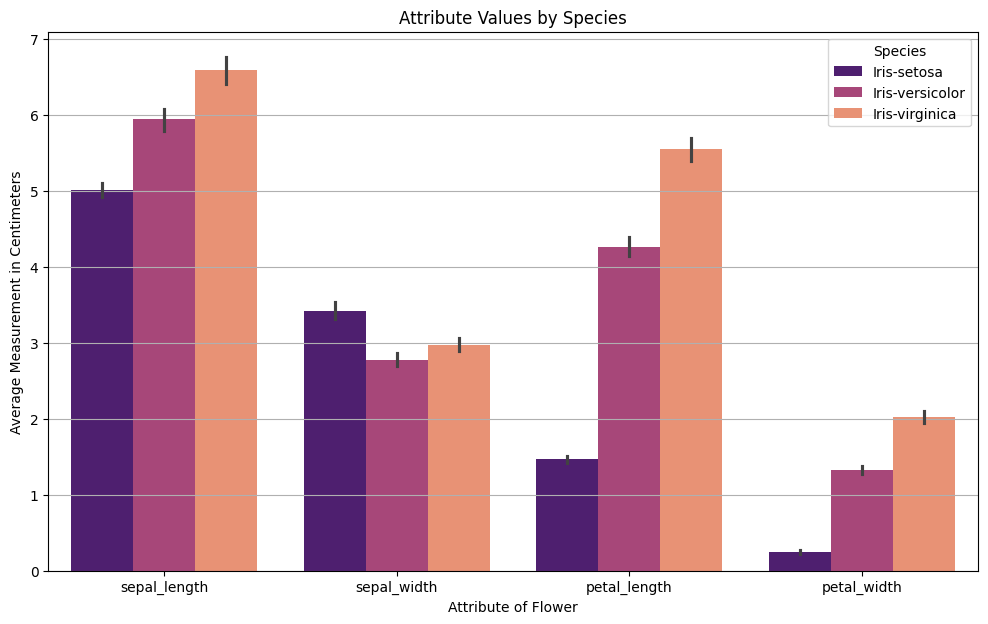

In [16]:
# Prepare data for bar plot
# This line was generated with the help of Gemini
df_melted = iris.melt(id_vars='species', var_name='attribute', value_name='value')

# Create the clustered bar plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df_melted,
    x='attribute',
    y='value',
    hue='species',
    palette='magma'
)

plt.title("Attribute Values by Species")
plt.xlabel("Attribute of Flower")
plt.ylabel("Average Measurement in Centimeters")
plt.legend(title="Species")
plt.grid(axis='y')
plt.show()

## K-Means Modeling

In [17]:
#Use Elbow Method to determine optimal number of clusters
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    inertia_list.append(kmeans.inertia_)

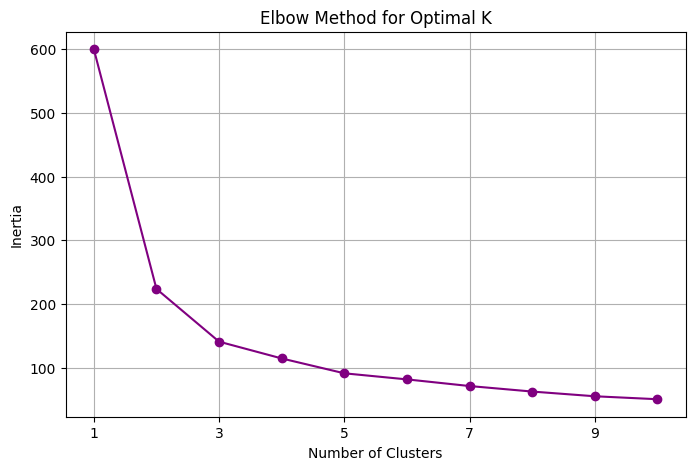

In [18]:
#Plot chart to find best K
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_list, color='purple', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
odd_ticks = range(1, 11, 2) # Set x-axis to show only odd numbers
plt.xticks(odd_ticks)
plt.grid(True)
plt.show()

In [19]:
# Silhouette scores for various cluster numbers
silhouette_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

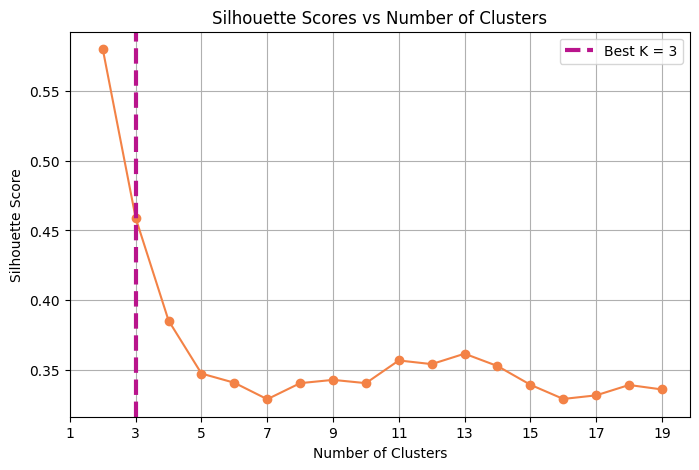

In [20]:
#Plot the silhouette scores for each K
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, color='#f38246', marker='o')
plt.axvline(x=3, color='#b9148c', linestyle='--', linewidth=3,label='Best K = 3')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores vs Number of Clusters")
odd_ticks = range(1, 20, 2)
plt.xticks(odd_ticks)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Final model with k=3
kmeans_final = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=42)
y_kmeans = kmeans_final.fit_predict(scaled_features)
final_score = silhouette_score(scaled_features, y_kmeans)
print(f"Silhouette Score (k=3): {final_score:.2f}")


Silhouette Score (k=3): 0.46


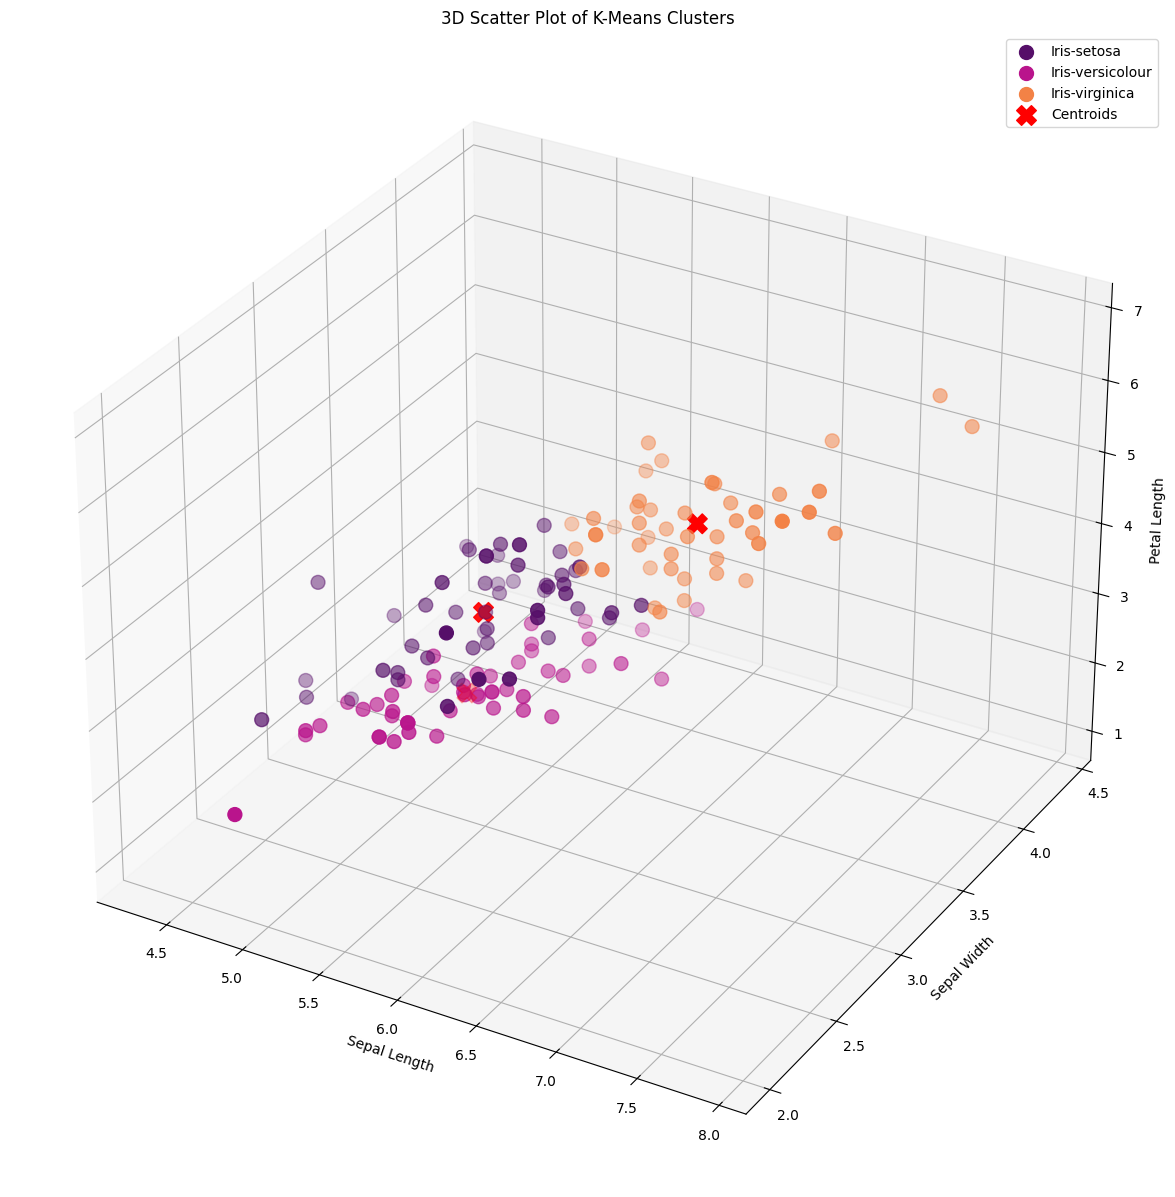

In [22]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

# Assuming x contains sepal_length, sepal_width, petal_length, petal_width
# We can use the first three features for the 3D plot: sepal_length, sepal_width, and petal_length
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 100, c = '#560f69', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], s = 100, c = '#b9148c', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], s = 100, c = '#f38246', label = 'Iris-virginica')

#Plotting the centroids of the clusters using the same three features
# Inverse transform the centroids to the original feature space
centroids_original_space = scaler.inverse_transform(kmeans_final.cluster_centers_)
ax.scatter(centroids_original_space[:, 0], centroids_original_space[:, 1], centroids_original_space[:, 2], s = 200, c = 'red', marker='X', label = 'Centroids')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of K-Means Clusters')
plt.legend()
plt.show()

In [23]:
# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

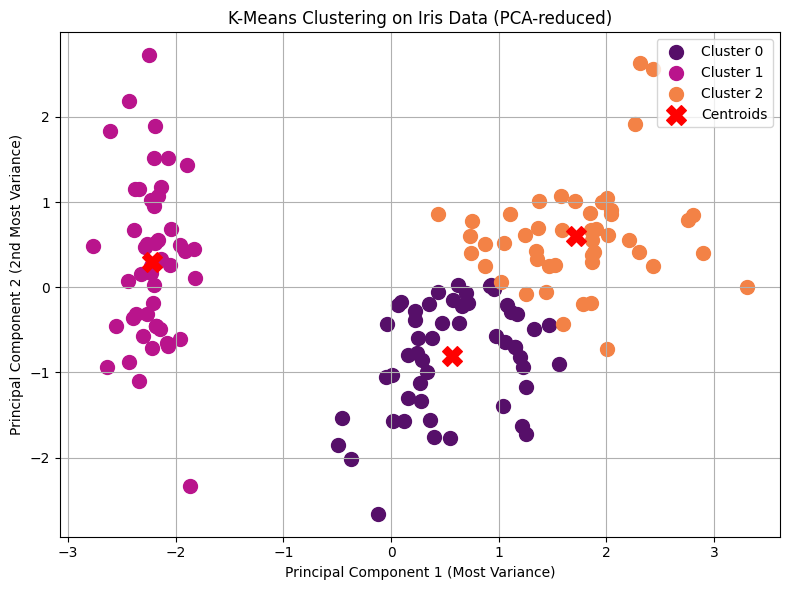

In [24]:
# Plot PCA projection with clusters
plt.figure(figsize=(8, 6))
colors = ['#560f69', '#b9148c', '#f38246']
for i in range(3):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, color=colors[i], label=f"Cluster {i}")

# Plot centroids
centroids_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='red', marker='X', label='Centroids')

plt.title("K-Means Clustering on Iris Data (PCA-reduced)")
plt.xlabel("Principal Component 1 (Most Variance)")
plt.ylabel("Principal Component 2 (2nd Most Variance)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Map each cluster label to the most common true label in that cluster
labels = np.zeros_like(y_kmeans, dtype=object) # Change dtype to object to accommodate string labels
for i in range(3):
    mask = (y_kmeans == i)
    # Use np.unique to find the most common non-numeric label
    unique_labels, counts = np.unique(y[mask], return_counts=True)
    labels[mask] = unique_labels[np.argmax(counts)]

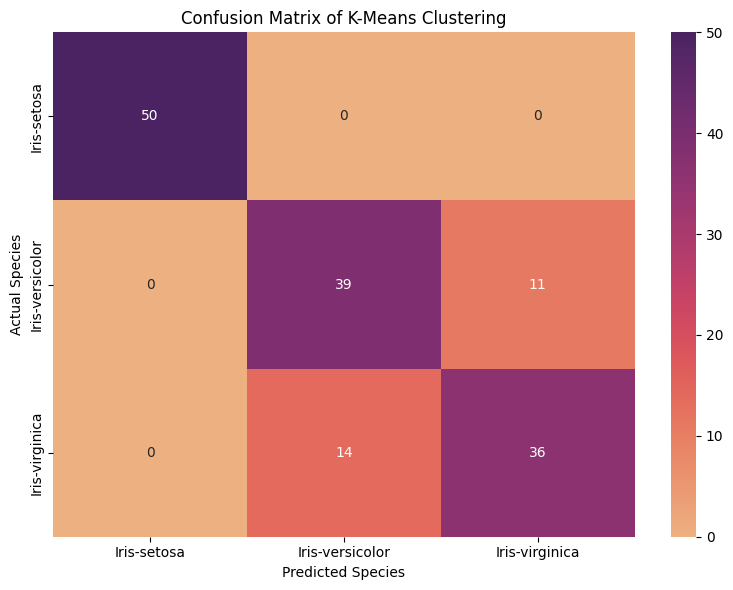

In [26]:
# Compute confusion matrix
cm = confusion_matrix(y, labels)
unique_classes = np.unique(y)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='flare',
            xticklabels=unique_classes, yticklabels=unique_classes)

plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.title('Confusion Matrix of K-Means Clustering')
plt.tight_layout()
plt.show()

In [27]:
# Print classification metrics
print("Classification Report:")
print(classification_report(y, labels, target_names=unique_classes))
print(f"Accuracy: {accuracy_score(y, labels):.2f}")

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.74      0.78      0.76        50
 Iris-virginica       0.77      0.72      0.74        50

       accuracy                           0.83       150
      macro avg       0.83      0.83      0.83       150
   weighted avg       0.83      0.83      0.83       150

Accuracy: 0.83
